In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Understanding/Predicting Returns
## Eliminate Waste - Understanding the attributes of a returned order will also Jiffy Shirts to know for example: 
 - which products that are shipped are often defected? Are often misinterpreted on the site? 
- Which customers are experiencing the most issues with their orders?

## Triage orders and prioritize shipping based on orders that a customer while actually consume - increased customer satisfaction from faster shipping

## Financial Planning - If average lead time is 4 weeks, Jiffy Shirts will be able to make forecasted revenue adjustments based on whats likely to be returned


In [34]:
orders = pd.read_csv("orders.csv")
items = pd.read_csv("line_items.csv")
customers = pd.read_csv("customers.csv")

In [4]:
orders.head()

,order_id,customer_uid,order_timestamp,discount,ship_state,shipping_revenue,shipping_cost,returned
0,38831,a6730d49e0989b2cc0158c6182fafb93,2015-11-30 05:03:15.159,0.00,FL,0.00,6.8,False
1,45499,ae2e8c1fa5326e1f793d4c02f720156c,2015-11-30 19:52:10.830,0.00,TN,5.95,6.8,True
2,69415,ba200839cd304b8342f8c5d0eb4d7c75,2015-12-02 22:54:40.380,0.00,TN,0.00,6.8,False
3,68761,b34cf44effba2eeb4d2a4db55ffe49d7,2015-12-02 20:24:30.925,0.00,MI,0.00,6.8,False
4,120057,10cedfe0d36280b646ff877ac1d916cb,2015-12-07 22:59:26.486,0.04,OH,0.00,6.8,False


In [5]:
items.head()

,line_item_id,order_id,quantity,selling_price,supplier_cost,product_category,color,size
0,1073625002,31323782,1,9.25,4.37,OTHER,BLACK,2XL
1,8055020046,22921936,1,9.25,4.37,OTHER,BLACK,2XL
2,5008546658,4435273,1,9.25,4.37,OTHER,BLACK,2XL
3,1013699827,6843815,1,9.25,4.37,OTHER,BLACK,2XL
4,1022146551,9923010,1,9.25,4.37,OTHER,RED,2XL


In [6]:
customers.head()

,customer_uid,is_business,has_account,bill_state,acquisition_channel
0,7d30104b82c22393003ac3c07b491c15,False,False,OK,coupon aggregator
1,77a48e4c4a69458d3421c54058350f93,False,False,CA,organic search
2,c9fe0dadc9e25ab478144bbd3a0ae750,False,False,WA,organic search
3,7a8bdb597d753c6c7430ea4e1d52fc48,False,False,TX,organic search
4,becb1413c375caba8707085efaac08e9,False,False,IL,organic search


In [3]:
df_all = orders.merge(items, on = 'order_id', how = 'left').merge(customers, on = 'customer_uid', how = 'left')

In [4]:
df_all['date'] = pd.to_datetime(df_all['order_timestamp'])
df_all= df_all.drop('order_timestamp', axis = 1)

In [9]:
df_all

,order_id,customer_uid,discount,ship_state,shipping_revenue,shipping_cost,returned,line_item_id,quantity,selling_price,supplier_cost,product_category,color,size,is_business,has_account,bill_state,acquisition_channel,date
0,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,False,4.000036e+09,4.0,3.02,1.91,Basic Tee,NAVY,L,False,True,FL,paid search,2015-11-30 05:03:15.159
1,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,False,4.000036e+09,1.0,3.41,1.89,OTHER,RED,L,False,True,FL,paid search,2015-11-30 05:03:15.159
2,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,False,4.000036e+09,4.0,3.02,1.91,Basic Tee,NAVY,S,False,True,FL,paid search,2015-11-30 05:03:15.159
3,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,False,4.000036e+09,1.0,6.84,3.69,OTHER,NAVY,S,False,True,FL,paid search,2015-11-30 05:03:15.159
4,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,False,4.000036e+09,2.0,3.02,1.91,Basic Tee,NAVY,XL,False,True,FL,paid search,2015-11-30 05:03:15.159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373874,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,False,1.910350e+10,2.0,2.89,2.00,Fashion Tee,BLACK,M,True,True,CT,paid search,2020-12-31 21:19:24.687
373875,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,False,1.910350e+10,5.0,2.89,2.00,Fashion Tee,BLACK,S,True,True,CT,paid search,2020-12-31 21:19:24.687
373876,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,False,1.910350e+10,2.0,2.89,2.00,Fashion Tee,BLACK,XL,True,True,CT,paid search,2020-12-31 21:19:24.687
373877,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,False,1.910350e+10,2.0,5.46,3.29,Fashion Tee,WHITE,2XL,True,True,CT,paid search,2020-12-31 21:19:24.687


In [5]:
df_all = df_all[~df_all['line_item_id'].isna()]
df_all = df_all[~df_all['selling_price'].isna()]
df_all = df_all[~df_all['bill_state'].isna()]

In [11]:
df_all.columns[df_all.isnull().any()]

Index([], dtype='object')

In [12]:
df_all[df_all['bill_state'].isna()]

,order_id,customer_uid,discount,ship_state,shipping_revenue,shipping_cost,returned,line_item_id,quantity,selling_price,supplier_cost,product_category,color,size,is_business,has_account,bill_state,acquisition_channel,date


<Axes: >

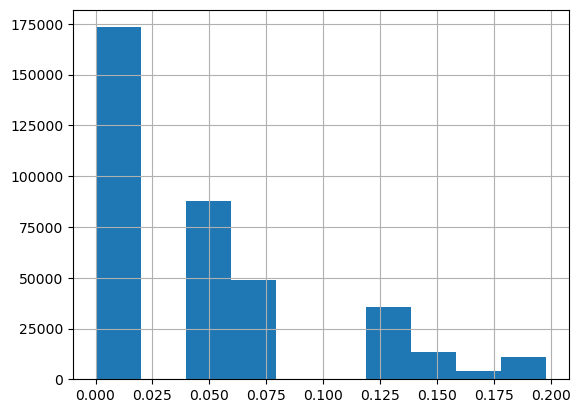

In [13]:
df_all['discount'].hist()

In [14]:
df_all.product_category.nunique()

5

In [15]:
df_all.color.nunique()

9

In [16]:
df_all.acquisition_channel.unique()

array(['paid search', 'direct', 'organic search', 'coupon aggregator',
       'referral', 'paid social'], dtype=object)

In [18]:
df_all

,order_id,customer_uid,discount,ship_state,shipping_revenue,shipping_cost,returned,line_item_id,quantity,selling_price,supplier_cost,product_category,color,size,is_business,has_account,bill_state,acquisition_channel,date
0,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,False,4.000036e+09,4.0,3.02,1.91,Basic Tee,NAVY,L,False,True,FL,paid search,2015-11-30 05:03:15.159
1,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,False,4.000036e+09,1.0,3.41,1.89,OTHER,RED,L,False,True,FL,paid search,2015-11-30 05:03:15.159
2,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,False,4.000036e+09,4.0,3.02,1.91,Basic Tee,NAVY,S,False,True,FL,paid search,2015-11-30 05:03:15.159
3,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,False,4.000036e+09,1.0,6.84,3.69,OTHER,NAVY,S,False,True,FL,paid search,2015-11-30 05:03:15.159
4,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,False,4.000036e+09,2.0,3.02,1.91,Basic Tee,NAVY,XL,False,True,FL,paid search,2015-11-30 05:03:15.159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373874,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,False,1.910350e+10,2.0,2.89,2.00,Fashion Tee,BLACK,M,True,True,CT,paid search,2020-12-31 21:19:24.687
373875,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,False,1.910350e+10,5.0,2.89,2.00,Fashion Tee,BLACK,S,True,True,CT,paid search,2020-12-31 21:19:24.687
373876,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,False,1.910350e+10,2.0,2.89,2.00,Fashion Tee,BLACK,XL,True,True,CT,paid search,2020-12-31 21:19:24.687
373877,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,False,1.910350e+10,2.0,5.46,3.29,Fashion Tee,WHITE,2XL,True,True,CT,paid search,2020-12-31 21:19:24.687


In [6]:
df_all['dow'] = df_all.date.dt.day_name()
dummy_df = pd.get_dummies(df_all, columns=['product_category', 'color','size','is_business','acquisition_channel','dow'], drop_first=False)
boolean_columns = dummy_df.select_dtypes(include='bool').columns
# Convert boolean columns to 1s and 0s
dummy_df[boolean_columns] = dummy_df[boolean_columns].astype(int)
dummy_df = dummy_df.drop(['is_business_False'], axis =1)
dummy_df

,order_id,customer_uid,discount,ship_state,shipping_revenue,shipping_cost,returned,line_item_id,quantity,selling_price,...,acquisition_channel_paid search,acquisition_channel_paid social,acquisition_channel_referral,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday
0,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,0,4.000036e+09,4.0,3.02,...,1,0,0,0,1,0,0,0,0,0
1,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,0,4.000036e+09,1.0,3.41,...,1,0,0,0,1,0,0,0,0,0
2,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,0,4.000036e+09,4.0,3.02,...,1,0,0,0,1,0,0,0,0,0
3,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,0,4.000036e+09,1.0,6.84,...,1,0,0,0,1,0,0,0,0,0
4,38831,a6730d49e0989b2cc0158c6182fafb93,0.00,FL,0.00,6.8,0,4.000036e+09,2.0,3.02,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373874,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,0,1.910350e+10,2.0,2.89,...,1,0,0,0,0,0,0,1,0,0
373875,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,0,1.910350e+10,5.0,2.89,...,1,0,0,0,0,0,0,1,0,0
373876,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,0,1.910350e+10,2.0,2.89,...,1,0,0,0,0,0,0,1,0,0
373877,96331780,e90fca766765e4292ad786b92446e014,0.04,CT,1.93,10.5,0,1.910350e+10,2.0,5.46,...,1,0,0,0,0,0,0,1,0,0


In [7]:
cols_sum = ['quantity','selling_price','product_category_Basic Tee',
       'product_category_Fashion Tee', 'product_category_OTHER',
       'product_category_Sweater', 'product_category_Tank Top', 'color_BLACK',
       'color_BLUE', 'color_COLOR', 'color_GRAY', 'color_GREEN',
       'color_HEATHER', 'color_NAVY', 'color_RED', 'color_WHITE', 'size_2XL',
       'size_3XL', 'size_4XL', 'size_L', 'size_M', 'size_OTHER', 'size_S',
       'size_XL', 'size_XS']
cols_max = ['customer_uid','date','discount','shipping_cost','returned','is_business_True',
       'acquisition_channel_coupon aggregator', 'acquisition_channel_direct',
       'acquisition_channel_organic search', 'acquisition_channel_paid search',
       'acquisition_channel_paid social', 'acquisition_channel_referral','dow_Friday', 'dow_Monday', 'dow_Saturday', 'dow_Sunday',
       'dow_Thursday', 'dow_Tuesday', 'dow_Wednesday']

In [8]:
dummy_df_agg = dummy_df.groupby('order_id').agg({**{col: 'max' for col in cols_max},**{col: 'sum' for col in cols_sum}}).reset_index()
dummy_df_agg = dummy_df_agg.rename(columns=lambda x: x.strip().replace(" ", "_"))

In [38]:
dummy_df_agg

,order_id,customer_uid,date,discount,shipping_cost,returned,is_business_True,acquisition_channel_coupon_aggregator,acquisition_channel_direct,acquisition_channel_organic_search,...,color_WHITE,size_2XL,size_3XL,size_4XL,size_L,size_M,size_OTHER,size_S,size_XL,size_XS
0,817,23b0844d1e9419787212fe81a4a6796a,2015-12-19 19:29:58.391,0.00,6.80,0,1,0,0,0,...,0,0,0,1,0,1,0,0,2,0
1,1533,33cfcf2abb8ed4847c0f5e4ca51cc3c8,2015-12-02 22:28:16.071,0.00,6.80,0,0,0,0,1,...,3,0,0,0,0,0,2,1,0,0
2,2589,c7d0bd76e6fb1ca84141eabeb5408fad,2016-01-12 23:05:13.955,0.04,6.80,0,1,0,0,0,...,0,0,0,0,7,3,0,2,1,0
3,3461,10cedfe0d36280b646ff877ac1d916cb,2015-11-25 19:36:48.114,0.00,6.80,0,1,0,0,0,...,3,0,0,0,0,2,0,5,0,0
4,3701,23b0844d1e9419787212fe81a4a6796a,2016-03-31 15:12:24.976,0.00,6.80,0,1,0,0,0,...,1,0,0,0,1,2,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46417,96331780,e90fca766765e4292ad786b92446e014,2020-12-31 21:19:24.687,0.04,10.50,0,1,0,0,0,...,4,2,2,0,2,1,0,1,3,0
46418,96349700,dfa7bcd46538fc0ae83ed9c097b7697c,2020-12-31 16:31:01.153,0.00,11.65,0,1,0,0,0,...,1,0,0,0,1,1,0,0,4,0
46419,96370097,7a67d66867b4b944b0479cf77a7dbec8,2020-12-31 17:34:04.086,0.04,11.65,0,1,0,0,0,...,0,0,0,0,0,1,3,0,0,0
46420,96391611,b12294f0b36abbd7081771c94c7c4afe,2020-12-31 19:43:46.162,0.00,10.50,0,0,0,0,0,...,0,2,0,0,0,1,1,0,2,0


In [40]:
dummy_df_agg.columns

Index(['order_id', 'customer_uid', 'date', 'discount', 'shipping_cost',
       'returned', 'is_business_True', 'acquisition_channel_coupon_aggregator',
       'acquisition_channel_direct', 'acquisition_channel_organic_search',
       'acquisition_channel_paid_search', 'acquisition_channel_paid_social',
       'acquisition_channel_referral', 'dow_Friday', 'dow_Monday',
       'dow_Saturday', 'dow_Sunday', 'dow_Thursday', 'dow_Tuesday',
       'dow_Wednesday', 'quantity', 'selling_price',
       'product_category_Basic_Tee', 'product_category_Fashion_Tee',
       'product_category_OTHER', 'product_category_Sweater',
       'product_category_Tank_Top', 'color_BLACK', 'color_BLUE', 'color_COLOR',
       'color_GRAY', 'color_GREEN', 'color_HEATHER', 'color_NAVY', 'color_RED',
       'color_WHITE', 'size_2XL', 'size_3XL', 'size_4XL', 'size_L', 'size_M',
       'size_OTHER', 'size_S', 'size_XL', 'size_XS'],
      dtype='object')

0.032425509110396565

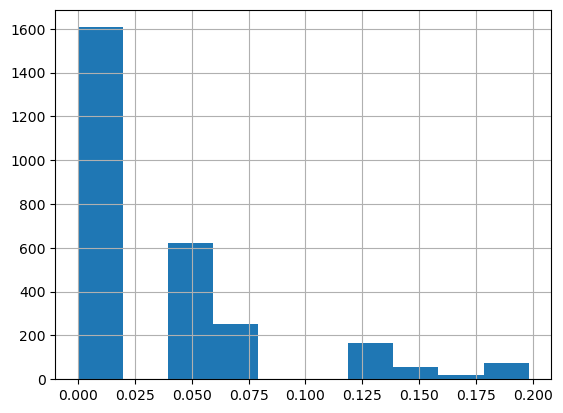

In [43]:
dummy_df_agg[dummy_df_agg['returned'] ==1]['discount'].hist()
dummy_df_agg[dummy_df_agg['returned'] ==1]['discount'].mean()

0.02329323980469019

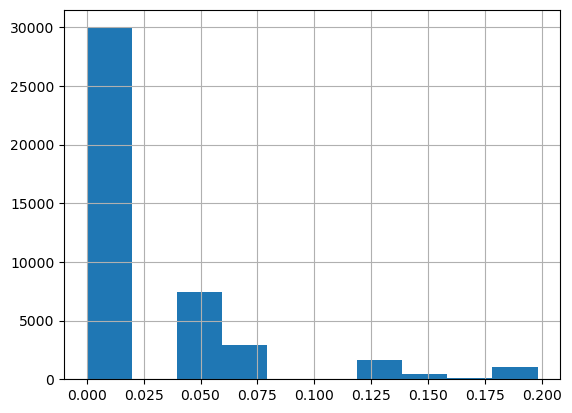

In [44]:
dummy_df_agg[dummy_df_agg['returned'] ==0]['discount'].hist()
dummy_df_agg[dummy_df_agg['returned'] ==0]['discount'].mean()

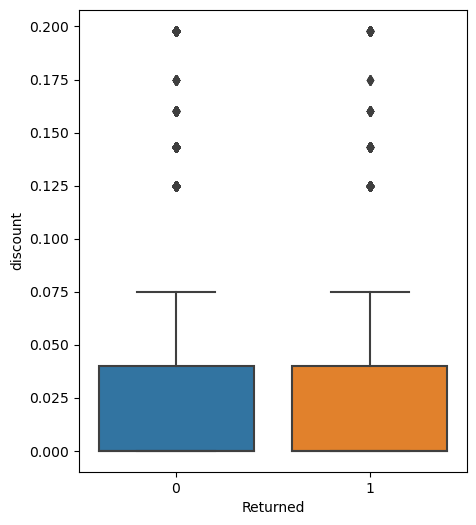

In [45]:
plt.figure(figsize=(5, 6))
sns.boxplot(x='returned', y='discount', data=dummy_df_agg)

plt.xlabel('Returned')
plt.ylabel('discount')

plt.show()

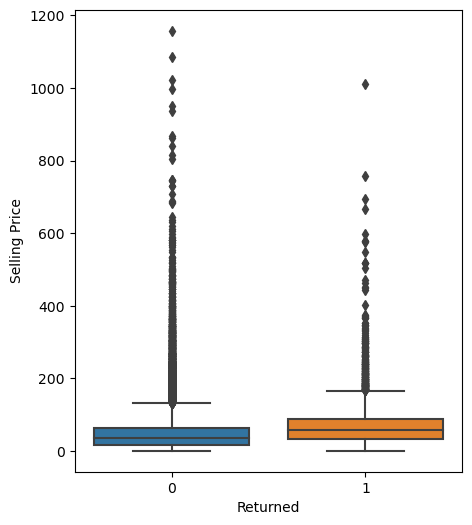

In [46]:
plt.figure(figsize=(5, 6))
sns.boxplot(x='returned', y='selling_price', data=dummy_df_agg)

plt.xlabel('Returned')
plt.ylabel('Selling Price')

plt.show()

In [47]:
pd.set_option('display.max_columns', None)
dummy_df_agg[dummy_df_agg['returned'] ==0].describe()

,order_id,date,discount,shipping_cost,returned,is_business_True,acquisition_channel_coupon_aggregator,acquisition_channel_direct,acquisition_channel_organic_search,acquisition_channel_paid_search,acquisition_channel_paid_social,acquisition_channel_referral,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,quantity,selling_price,product_category_Basic_Tee,product_category_Fashion_Tee,product_category_OTHER,product_category_Sweater,product_category_Tank_Top,color_BLACK,color_BLUE,color_COLOR,color_GRAY,color_GREEN,color_HEATHER,color_NAVY,color_RED,color_WHITE,size_2XL,size_3XL,size_4XL,size_L,size_M,size_OTHER,size_S,size_XL,size_XS
count,4.362300e+04,43623,43623.000000,43623.000000,43623.0,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.00000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000,43623.000000
mean,2.660481e+07,2019-04-17 09:19:50.140014848,0.023293,8.150660,0.0,0.601838,0.035486,0.174380,0.034798,0.707402,0.019164,0.028769,0.129106,0.196479,0.080187,0.081975,0.160672,0.177911,0.17367,18.500195,50.340619,2.102698,2.918690,2.290902,0.467047,0.082548,1.705706,0.450061,1.979667,0.674942,0.326983,0.922931,0.227953,0.572794,1.000848,0.726016,0.274603,0.081356,1.760631,1.637256,0.744470,1.026271,1.464434,0.146849
min,8.170000e+02,2015-11-25 19:36:48.114000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.027247e+07,2018-06-14 09:39:03.299000064,0.000000,7.390000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.000000,18.065000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.021287e+07,2019-07-08 20:57:32.143000064,0.000000,7.940000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,11.000000,37.050000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3.040496e+07,2020-05-16 19:19:59.494000128,0.040000,8.540000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,20.000000,64.120000,3.000000,4.000000,3.000000,0.000000,0.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.000000
max,9.639224e+07,2021-01-01 01:00:11.137000,0.198000,19.950000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2477.000000,1157.830000,69.000000,174.000000,74.000000,38.000000,29.000000,42.000000,25.000000,89.000000,33.000000,34.000000,51.000000,24.000000,20.000000,35.000000,24.000000,15.000000,20.000000,45.000000,64.000000,74.000000,25.000000,47.000000,18.000000
std,2.285509e+07,NaN,0.043968,1.664521,0.0,0.489525,0.185007,0.379441,0.183270,0.454961,0.137103,0.167159,0.335321,0.397339,0.271586,0.274330,0.367232,0.382442,0.37883,33.470939,53.444879,4.069470,5.418433,3.57108

In [9]:
pd.set_option('display.max_columns', None)
dummy_df_agg[dummy_df_agg['returned'] ==1].describe()

,order_id,date,discount,shipping_cost,returned,is_business_True,acquisition_channel_coupon_aggregator,acquisition_channel_direct,acquisition_channel_organic_search,acquisition_channel_paid_search,acquisition_channel_paid_social,acquisition_channel_referral,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,quantity,selling_price,product_category_Basic_Tee,product_category_Fashion_Tee,product_category_OTHER,product_category_Sweater,product_category_Tank_Top,color_BLACK,color_BLUE,color_COLOR,color_GRAY,color_GREEN,color_HEATHER,color_NAVY,color_RED,color_WHITE,size_2XL,size_3XL,size_4XL,size_L,size_M,size_OTHER,size_S,size_XL,size_XS
count,2.799000e+03,2799,2799.000000,2799.000000,2799.0,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.00000,2799.000000,2799.000000,2799.00000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000
mean,2.656630e+07,2019-05-21 02:55:16.039735040,0.032426,8.304173,1.0,0.678457,0.026081,0.159343,0.017149,0.748482,0.012504,0.036442,0.131833,0.216863,0.071454,0.085388,0.163987,0.162201,0.168274,23.872454,74.342840,1.755984,4.933548,3.743480,0.440514,0.153269,2.157199,0.758485,2.684530,0.977135,0.453733,1.628439,0.248303,0.842801,1.27617,0.843516,0.275456,0.06931,2.404430,2.440514,1.104680,1.659879,1.933548,0.295463
min,3.793500e+04,2015-11-30 02:44:15.210000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.173086e+07,2018-08-31 05:45:32.480999936,0.000000,7.390000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,34.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.023537e+07,2019-07-08 15:08:34.454000128,0.000000,7.940000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,58.530000,0.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000
75%,2.976821e+07,2020-04-28 02:20:29.091500032,0.040000,8.540000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,87.310000,2.000000,7.000000,5.000000,0.000000,0.000000,3.000000,1.000000,4.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.00000,1.000000,0.000000,0.00000,3.000000,3.000000,1.000000,2.000000,3.000000,0.000000
max,9.608819e+07,2020-12-31 19:06:39.822000,0.198000,19.950000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,614.000000,1012.230000,63.000000,76.000000,44.000000,32.000000,19.000000,29.000000,16.000000,46.000000,18.000000,19.000000,40.000000,10.000000,24.000000,32.00000,19.000000,9.000000,5.00000,29.000000,30.000000,39.000000,21.000000,17.000000,12.000000
std,2.207299e+07,NaN,0.048921,1.727303,0.0,0.467152,0.159404,0.366061,0.129850,0.433963,0.111142,0.187420,0.338369,0.412182,0.257628,0.279508,0.370330,0.368701,0.374177,36.333798,70.827086,4.031077,6.786008,4.708888,1.600555,0.915135,2.996712,1.667794,3.633418,1.8094

In [10]:
anova_cols = [i for i in dummy_df_agg if i not in ['returned', 'date','order_id','customer_uid']]

In [78]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA
formula = 'returned ~ ' + ' + '.join(anova_cols)
model = ols(formula, data=dummy_df_agg.sample(10000)).fit()
model.summary()
anova_table = sm.stats.anova_lm(model, typ=1)


In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               returned   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     8.180
Date:                Fri, 01 Dec 2023   Prob (F-statistic):           1.18e-42
Time:                        21:26:58   Log-Likelihood:                 536.21
No. Observations:               10000   AIC:                            -996.4
Df Residuals:                    9962   BIC:                            -722.4
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -0.0063      0.010     -0.643      0.520      -0.025       0.013
discount                                  0.0031      0.067      0.046      0.963      -0.127       0.133
shipping_cost                             0.0041      0.001      2.872      0.004       0.001       0.007
is_business_True                          0.0271      0.007      3.644      0.000       0.013       0.042
acquisition_channel_coupon_aggregator     0.0184      0.011      1.604      0.109      -0.004       0.041
acquisition_channel_direct                0.0060      0.007      0.920      0.357      -0.007       0.019
acquisition_channel_organic_search       -0.0169      0.012     -1.430      0.153      -0.040       0.006
acquisition_channel_paid_search          -0.0163      0.007     -2.210      0.027      -0.031      -0.002
acquisition_channel_paid_social          -0.0275      0.015     -1.822      0.068      -0.057       0.002
acquisition_channel_referral              0.0299      0.012      2.401      0.016       0.005       0.054
dow_Friday                                0.0001      0.006      0.021      0.983      -0.012       0.012
dow_Monday                                0.0047      0.005      0.913      0.361      -0.005       0.015
dow_Saturday                             -0.0025      0.008     -0.337      0.736      -0.017       0.012
dow_Sunday                               -0.0107      0.008     -1.408      0.159      -0.026       0.004
dow_Thursday                             -0.0011      0.006     -0.193      0.847      -0.012       0.010
dow_Tuesday                              -0.0025      0.005     -0.474      0.635      -0.013       0.008
dow_Wednesday                             0.0057      0.005      1.053      0.292      -0.005       0.016
quantity                               -8.75e-05      0.000     -0.789      0.430      -0.000       0.000
selling_price                             0.0005   9.87e-05      4.955      0.000       0.000       0.001
product_category_Basic_Tee               -0.0027      0.001     -3.481      0.001      -0.004      -0.001
product_category_Fashion_Tee           7.526e-05      0.001      0.105      0.916      -0.001       0.001
product_category_OTHER                    0.0032      0.001      3.459      0.001       0.001       0.005
product_category_Sweater                 -0.0094      0.002     -5.317      0.000      -0.013      -0.006
product_category_Tank_Top                 0.0062      0.003      2.222      0.026       0.001       0.012
color_BLACK                              -0.0014      0.001     -1.339      0.181      -0.004       0.001
color_BLUE                                0.0035      0.002      1.816      0.069      -0.000       0.007
color_COL

In [85]:
# are the means of the 2 groups statistically significant across any variables
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
discount,1.0,1.270857,1.270857,24.070864,9.432449e-07
shipping_cost,1.0,0.630538,0.630538,11.942811,5.508739e-04
is_business_True,1.0,0.403745,0.403745,7.647205,5.696501e-03
acquisition_channel_coupon_aggregator,1.0,0.104918,0.104918,1.987209,1.586643e-01
acquisition_channel_direct,1.0,0.161644,0.161644,3.061641,8.019148e-02
acquisition_channel_organic_search,1.0,0.042564,0.042564,0.806198,3.692685e-01
acquisition_channel_paid_search,1.0,0.056418,0.056418,1.068596,3.012879e-01
acquisition_channel_paid_social,1.0,0.418971,0.418971,7.935589,4.856723e-03
acquisition_channel_referral,1.0,0.008023,0.008023,0.151955,6.966825e-01
dow_Friday,1.0,0.000372,0.000372,0.007039,9.331401e-01


In [11]:
# Lets assess if this is predictable with a lightly tuned XGBoost model
#create features for rolling averages
dummy_df_agg.sort_values("date",inplace = True)
dummy_df_agg.head()

,order_id,customer_uid,date,discount,shipping_cost,returned,is_business_True,acquisition_channel_coupon_aggregator,acquisition_channel_direct,acquisition_channel_organic_search,acquisition_channel_paid_search,acquisition_channel_paid_social,acquisition_channel_referral,dow_Friday,dow_Monday,dow_Saturday,dow_Sunday,dow_Thursday,dow_Tuesday,dow_Wednesday,quantity,selling_price,product_category_Basic_Tee,product_category_Fashion_Tee,product_category_OTHER,product_category_Sweater,product_category_Tank_Top,color_BLACK,color_BLUE,color_COLOR,color_GRAY,color_GREEN,color_HEATHER,color_NAVY,color_RED,color_WHITE,size_2XL,size_3XL,size_4XL,size_L,size_M,size_OTHER,size_S,size_XL,size_XS
3,3461,10cedfe0d36280b646ff877ac1d916cb,2015-11-25 19:36:48.114,0.00,6.8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,9.0,54.09,1,1,2,3,0,1,0,1,2,0,0,0,0,3,0,0,0,0,2,0,5,0,0
11,14364,e2322693c3b6c76423772f9171264bd1,2015-11-27 12:48:23.323,0.00,6.8,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,3.0,8.09,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
12,15939,c7d0bd76e6fb1ca84141eabeb5408fad,2015-11-27 18:58:10.389,0.04,6.8,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,26.0,46.26,0,1,8,0,0,1,0,7,0,0,0,0,0,1,0,0,0,0,1,7,0,1,0
18,23291,e39c17251e5e11bb17350875b2a36a2a,2015-11-28 13:43:02.421,0.00,6.8,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1.0,2.72,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
22,28335,2000a3b69e4b57006a15f95409be54b7,2015-11-29 01:31:22.020,0.04,6.8,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,13.0,150.81,0,0,13,0,0,0,3,10,0,0,0,0,0,0,0,0,0,5,2,0,2,4,0


In [12]:
dummy_df_agg['rollin_5_rr'] = dummy_df_agg.groupby("customer_uid")['returned'].rolling(window=5, min_periods=2).mean().reset_index(level=0, drop=True)
dummy_df_agg['rollin_5_rr'] = dummy_df_agg.groupby('customer_uid')['rollin_5_rr'].shift(1)

dummy_df_agg['rollin_50_rr'] = dummy_df_agg.groupby("customer_uid")['returned'].rolling(window=50, min_periods=6).mean().reset_index(level=0, drop=True)
dummy_df_agg['rollin_50_rr'] = dummy_df_agg.groupby('customer_uid')['rollin_50_rr'].shift(1)


dummy_df_agg['rollin_5_rr'] = dummy_df_agg['rollin_5_rr'].fillna(dummy_df_agg['rollin_5_rr'].mean())
dummy_df_agg['rollin_50_rr'] = dummy_df_agg['rollin_50_rr'].fillna(dummy_df_agg['rollin_50_rr'].mean())

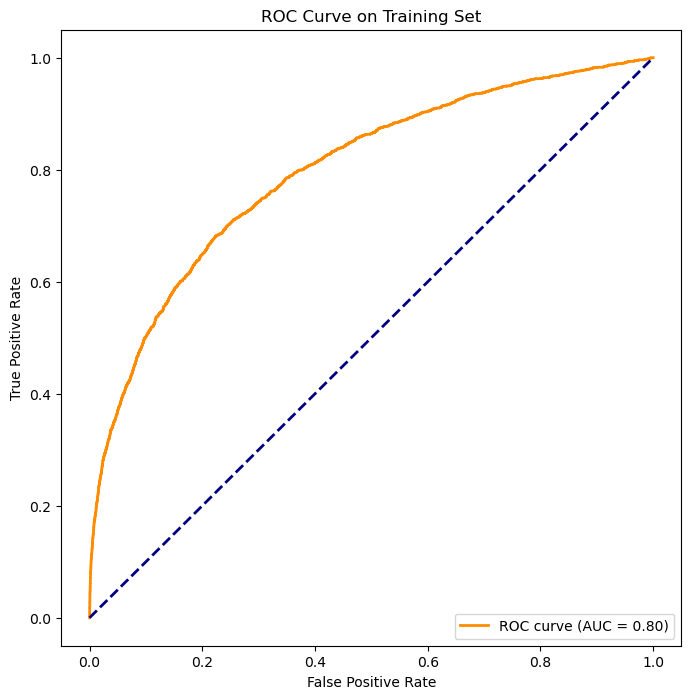

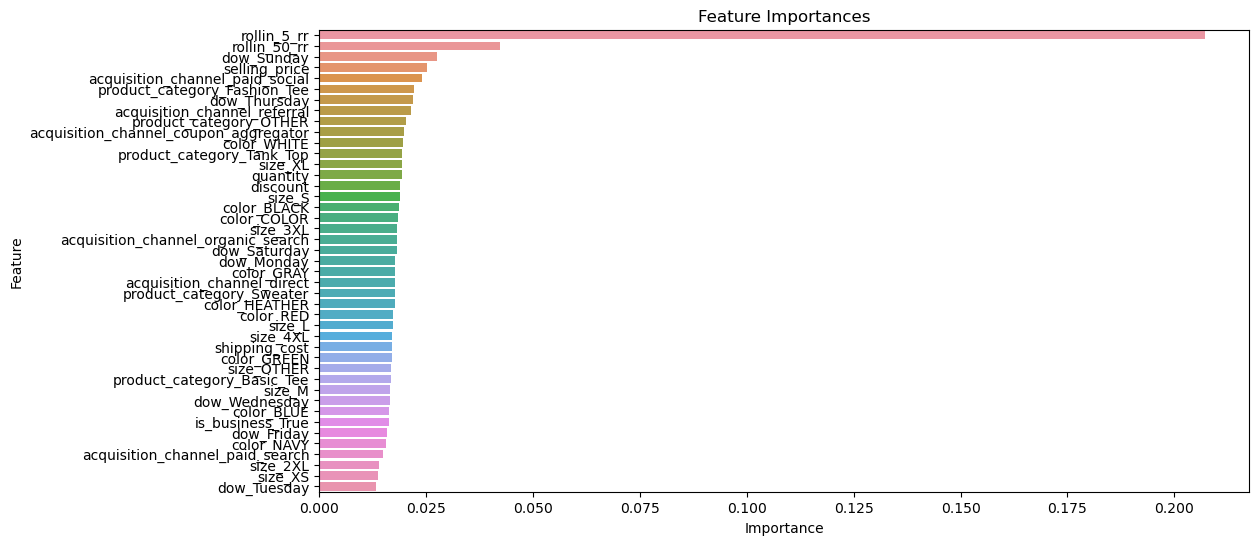

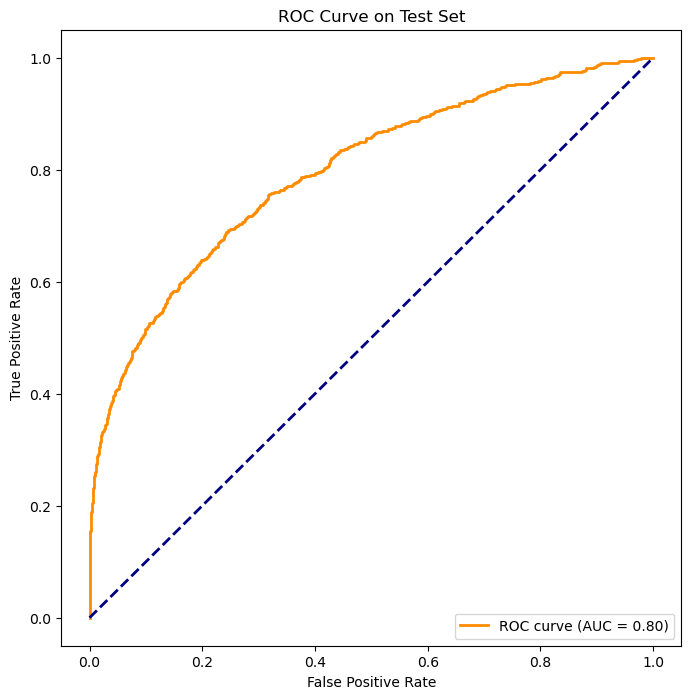

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
fin_df = dummy_df_agg.drop(['order_id','customer_uid','date'], axis = 1)
train_size = 35000

train_set = fin_df.head(train_size)

test_set = fin_df.tail(len(fin_df) - train_size)

X_train = train_set.drop('returned', axis=1)
y_train = train_set['returned']

X_test = test_set.drop('returned', axis=1)
y_test = test_set['returned']

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=0)

# Perform cross-fold validation on the training set
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
y_pred_proba = cross_val_predict(xgb_model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]

# Plot ROC curve on the training set
fpr, tpr, thresholds = roc_curve(y_train, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Training Set')
plt.legend(loc="lower right")
plt.show()

# Train the final model on the entire training set
final_model = xgb_model.fit(X_train, y_train)

# Display feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': final_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# Evaluate the final model on the test set
y_pred_proba_test = final_model.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve on the test set
plt.figure(figsize=(8, 8))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on Test Set')
plt.legend(loc="lower right")
plt.show()


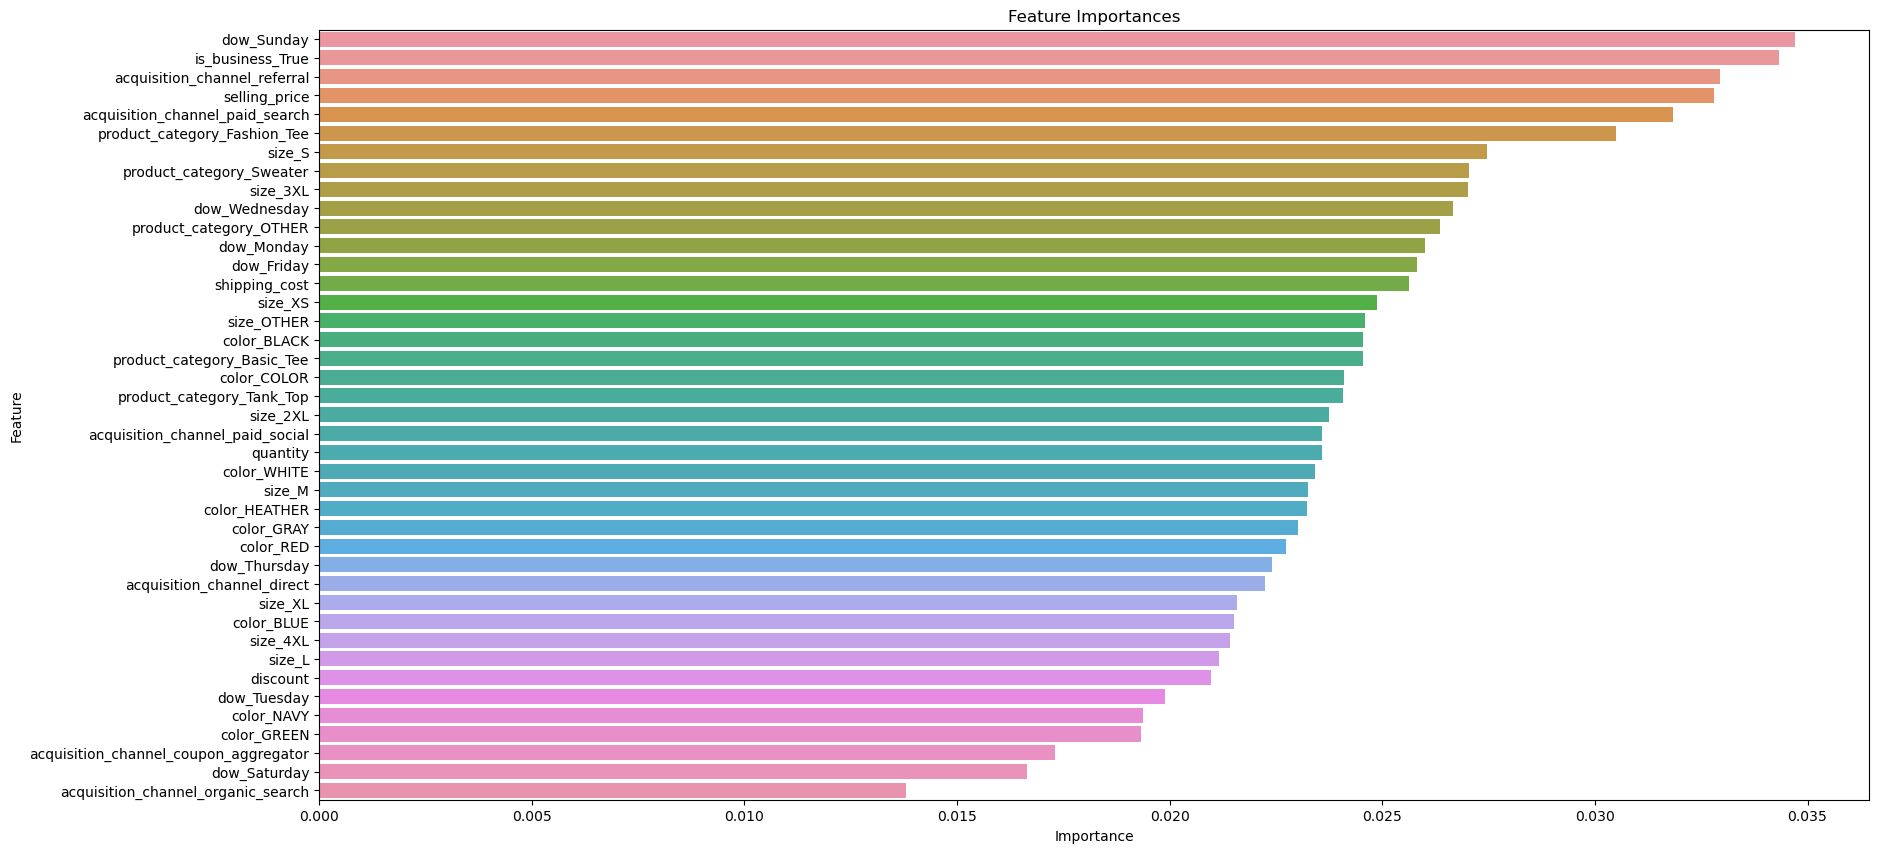

In [32]:
# Lets train one more time but without our most important features to see where other features stack up

fin_df = dummy_df_agg.drop(['order_id','customer_uid','date', 'rollin_5_rr','rollin_50_rr'], axis = 1)
train_size = 35000

train_set = fin_df.head(train_size)

test_set = fin_df.tail(len(fin_df) - train_size)

X_train = train_set.drop('returned', axis=1)
y_train = train_set['returned']

X_test = test_set.drop('returned', axis=1)
y_test = test_set['returned']

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=0)

# Perform cross-fold validation on the training set
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
y_pred_proba = cross_val_predict(xgb_model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]


final_model = xgb_model.fit(X_train, y_train)

# Display feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': final_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

## From the OLS and ANOVA test, we found that:
- product_category_OTHER, being a business, and selling price are associated with more returns. 
- product_category_Basic_Tee, product_category_Basic_Tee, and buying on weekends, are associated with fewer returns. 


## From the XGBoost modeling:
- we discovered that returns are fairly predictable
- Previous customer behavior is by far the most important factor in predicting